In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
from google.colab import files


uploaded = files.upload()


Saving car data.csv to car data.csv


In [19]:
data = pd.read_csv("car data.csv")
print ("data is imported")

data is imported


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
data.shape

(301, 9)

In [21]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [24]:
data.Selling_type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [25]:
data.Owner.unique()

array([0, 1, 3])

In [26]:
data.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [27]:
data.Transmission.unique()



array(['Manual', 'Automatic'], dtype=object)

In [28]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [29]:
items_to_delete = {
    'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
    'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350',
    'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
    'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
    'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150',
    'Hero Extreme', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0',
    'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro',
    'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 'Honda Dream Yuga ',
    'Bajaj Avenger Street 220', 'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
    'Honda CB Trigger', 'Yamaha FZ S ', 'Bajaj Pulsar 135 LS', 'Activa 4g', 'Honda CB Unicorn',
    'Hero Honda CBZ extreme', 'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
    'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine', 'Bajaj Discover 100',
    'Suzuki Access 125', 'TVS Wego', 'Honda CB twister', 'Hero Glamour', 'Hero Super Splendor',
    'Bajaj Discover 125', 'Hero Hunk', 'Hero  Ignitor Disc', 'Hero  CBZ Xtreme', 'Bajaj  ct 100'
}
data = data[~data['Car_Name'].isin(items_to_delete)]
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'i20', 'grand i10', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [30]:
data['Car_Age'] = 2023-data['Year']
data.drop(labels='Year',axis=1,inplace=True)

In [31]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [32]:
data.shape

(200, 9)

In [33]:
print(data.describe())

       Selling_Price  Present_Price     Driven_kms       Owner     Car_Age
count     200.000000     200.000000     200.000000  200.000000  200.000000
mean        6.691650      10.980750   41404.880000    0.035000    9.410000
std         5.150122       8.877698   27415.814725    0.253171    2.886792
min         0.350000       2.280000    2071.000000    0.000000    5.000000
25%         3.637500       6.467500   22332.750000    0.000000    7.000000
50%         5.250000       8.450000   40000.000000    0.000000    9.000000
75%         7.562500      13.495000   53513.750000    0.000000   11.000000
max        35.000000      92.600000  197176.000000    3.000000   20.000000


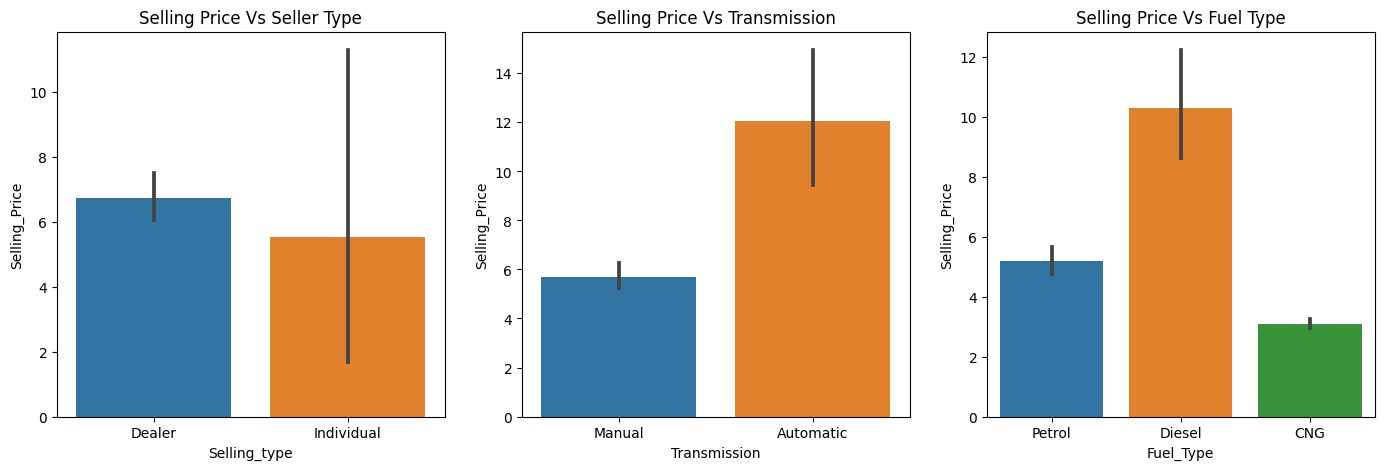

In [34]:
plt.figure(figsize=[17,5])

plt.subplot(1,3,1)
sns.barplot(x='Selling_type', y='Selling_Price', data=data)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price Vs Fuel Type')

plt.show()

<ipython-input-35-05bc8b3f48ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(data.corr())


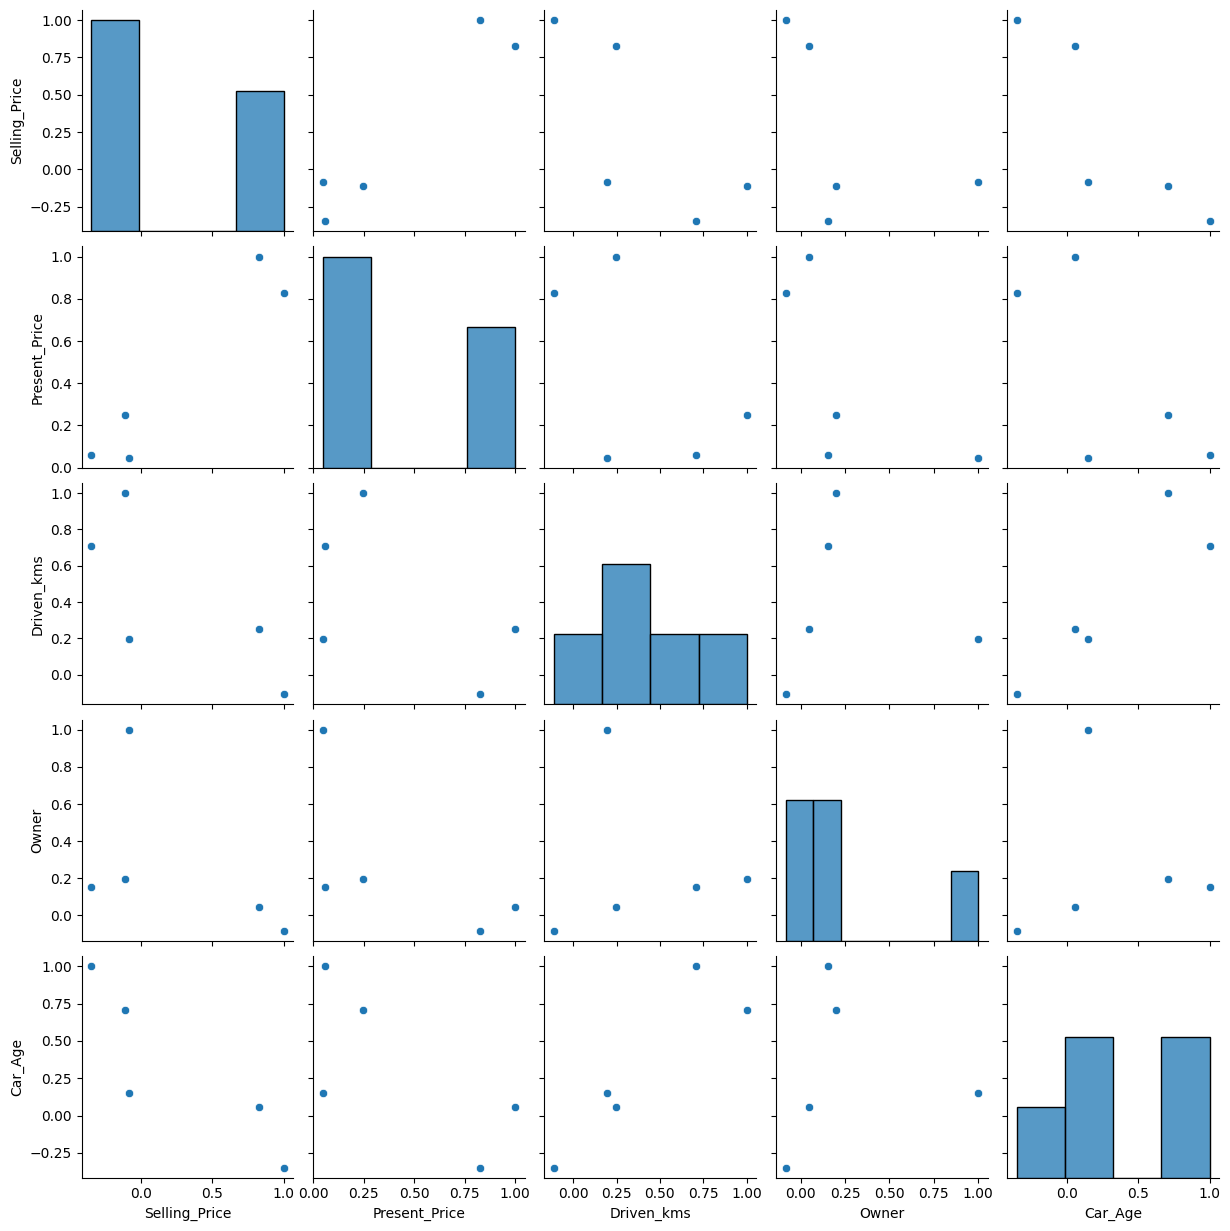

In [35]:

import seaborn as sns
sns.pairplot(data.corr())

<ipython-input-36-42104d25d593>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


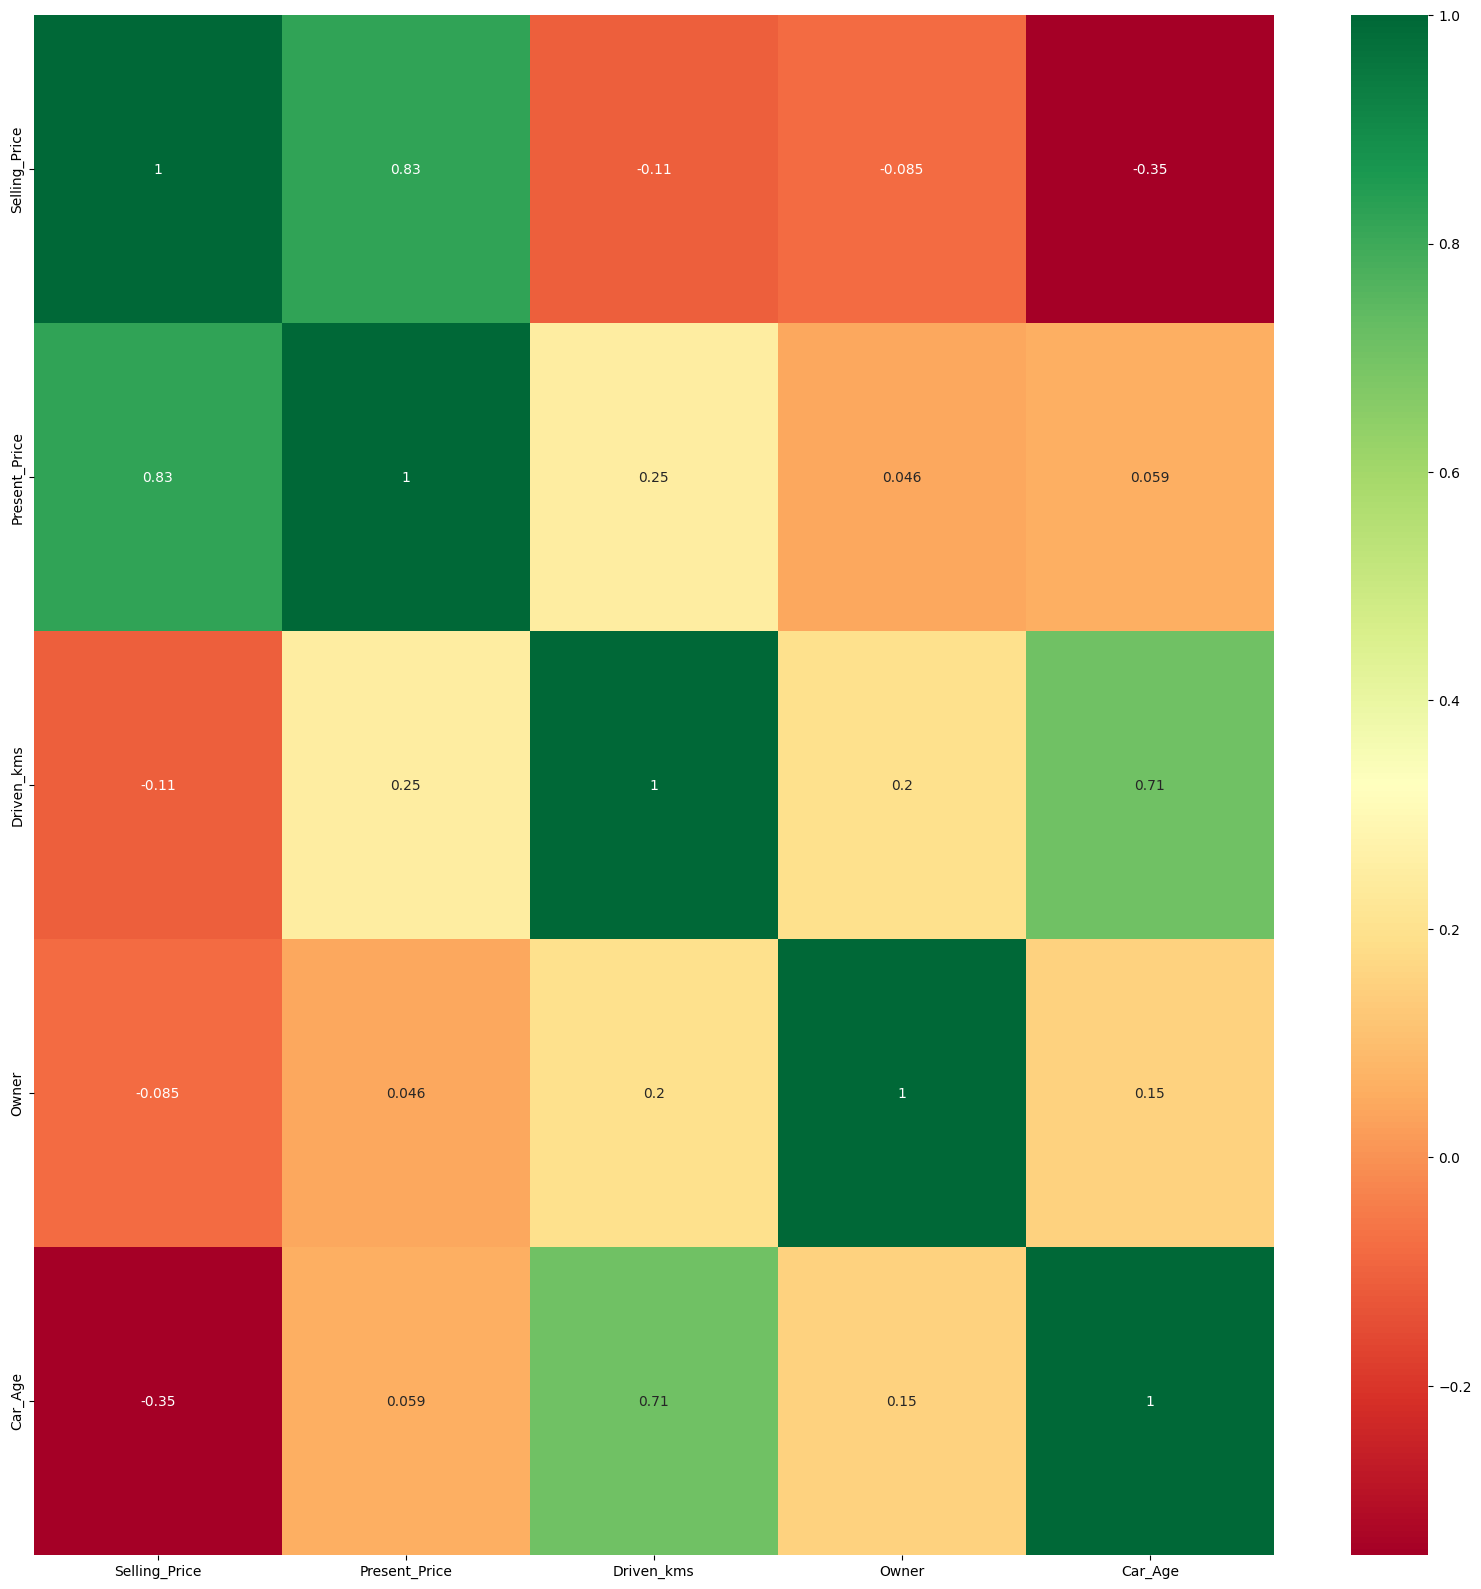

In [36]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<ipython-input-37-a694f8fa46c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

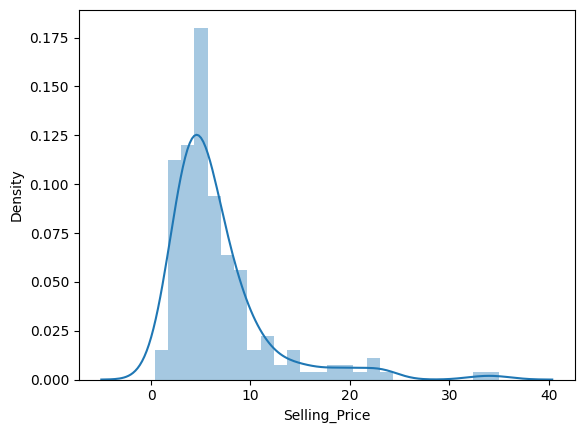

In [37]:
sns.distplot(data['Selling_Price'])

<ipython-input-38-37a3316fae18>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Present_Price'])


<Axes: xlabel='Present_Price', ylabel='Density'>

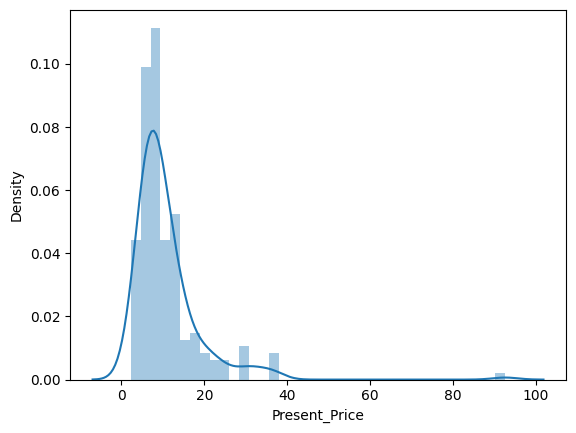

In [38]:
sns.distplot(data['Present_Price'])

<ipython-input-39-90eb0cbbd0aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Driven_kms'])


<Axes: xlabel='Driven_kms', ylabel='Density'>

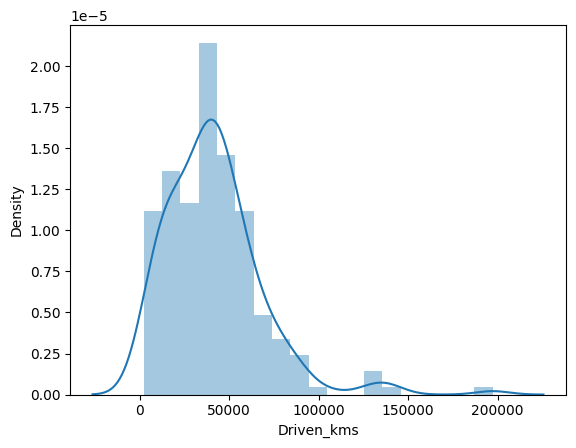

In [39]:
sns.distplot(data['Driven_kms'])

In [40]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [41]:
data

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,1,0,0,0,7
297,brio,4.00,5.90,60000,0,0,0,0,8
298,city,3.35,11.00,87934,0,0,0,0,14
299,city,11.50,12.50,9000,1,0,0,0,6


In [42]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [43]:
X

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,7
297,5.90,60000,0,0,0,0,8
298,11.00,87934,0,0,0,0,14
299,12.50,9000,1,0,0,0,6


In [44]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 200, dtype: float64

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [46]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([ 8.04916892,  2.26550353,  7.18845601,  8.46360638,  6.87823961,
        8.13527107, 10.45034683,  5.7264504 ,  9.48779494,  7.15095858,
        4.84122275,  4.57095103,  0.6916399 ,  2.12337295, 11.00012596,
        7.54926913,  7.28068773,  7.31981517, -4.82166997,  5.4738742 ,
        4.36066622,  3.40844958,  9.95950916,  8.16519826,  8.64453165,
        7.65878332,  5.02519201,  5.77750843,  6.87182817,  1.13107848,
        8.1729582 ,  7.15466266,  4.35539371,  8.40233015,  5.73786117,
        4.65590132,  6.63133127,  6.06999781,  9.43560505,  6.97758305,
        7.31474825, 16.05435855,  2.70708873,  5.56949548,  6.60177176,
       21.40126093,  8.56054909,  4.62653199,  4.47640615,  6.4865621 ,
        7.1009487 ,  2.5170868 ,  9.29315543, 11.45680361,  9.98628611,
        2.02643146,  4.53479193,  5.79233128,  8.6840767 ,  4.66126755])

In [49]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-Squred (R2): {r2:.2f}")

 Mean Squared Error (MSE): 3.78
 R-Squred (R2): 0.78


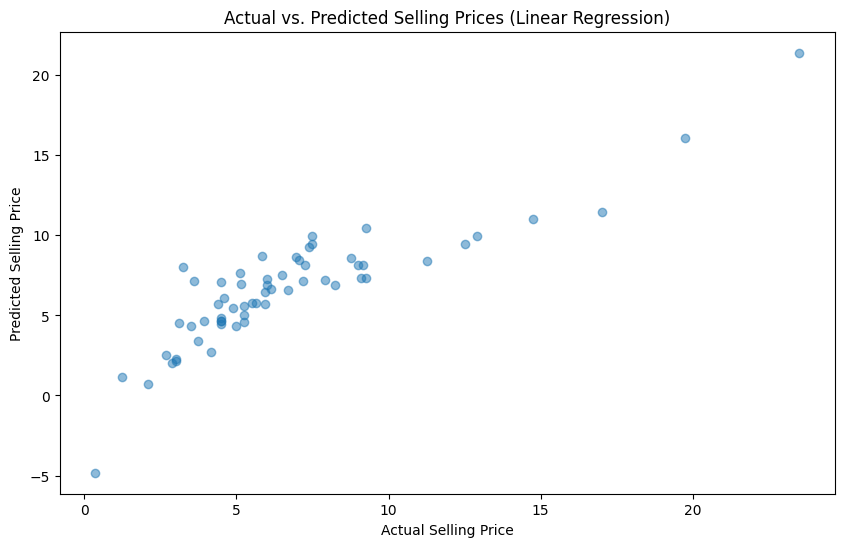

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, Y_train)
rf_Y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_Y_pred)*100
rf_r2 = r2_score(Y_test, rf_Y_pred)*100
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 150.70
Random Forest R-squared (R2): 91.22


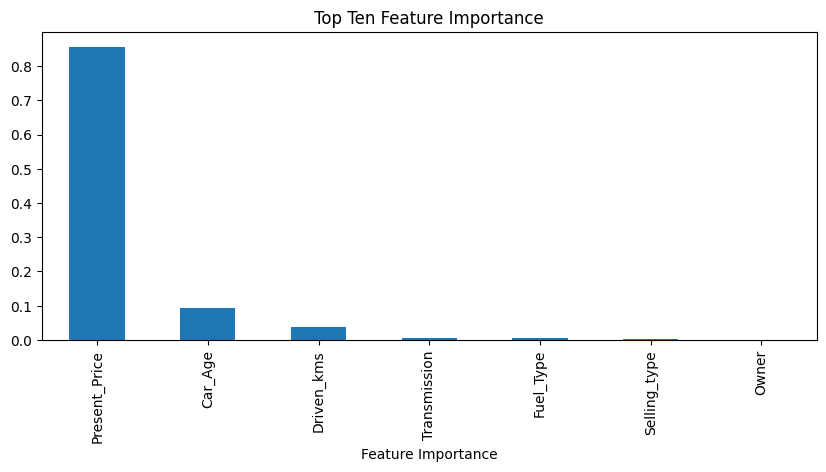

In [52]:
feature_importance = pd.Series(rf_model.feature_importances_, index = X.columns)
plt.figure(figsize=(10,4))
feature_importance.nlargest(10).plot(kind = 'bar')
plt.xlabel('Feature Importance')
plt.title('Top Ten Feature Importance')
plt.show()